In [1]:
from google.colab import drive

# Attempt to unmount first in case of a prior incomplete mount
try:
    drive.flush_and_unmount()
    print('Drive unmounted successfully.')
except ValueError:
    pass

# Mount with a longer timeout (300 seconds)
drive.mount('/content/drive', force_remount=True, timeout_ms=300000)

Drive not mounted, so nothing to flush and unmount.
Drive unmounted successfully.
Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/USA_cars_datasets.csv', delimiter=',')

print(df.columns)

id = df['Unnamed: 0'].to_numpy()
Make = df['brand'].to_numpy()
Model = df['model'].to_numpy()
Year = df['year'].to_numpy()
Mileage = df['mileage'].to_numpy()
Price = df['price'].to_numpy()

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')


In [9]:
original_sample_size = df.shape[0]

df_cleaned = df.dropna()

new_sample_size = df_cleaned.shape[0]

print(f"Original sample size: {original_sample_size}")
print(f"New sample size after cleaning: {new_sample_size}")

Original sample size: 2499
New sample size after cleaning: 2499


In [10]:
japanese_brands = ['infiniti', 'nissan', 'toyota', 'honda', 'acura', 'lexus', 'mazda', 'subaru']
japanese_cars = df[df['brand'].isin(japanese_brands)]

# Now japanese_cars contains only the vehicles from the specified Japanese brands.
# You can further process or analyze this DataFrame as needed.
japanese_cars

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
31,31,18500,infiniti,q70,2016,clean vehicle,71967.0,gray,jn1by1ar7gm271292,167801920,new york,usa,19 hours left
290,290,0,mazda,door,2009,salvage insurance,117541.0,gray,jm3er293590215768,167543177,indiana,usa,16 hours left
297,297,0,honda,door,2003,salvage insurance,152608.0,white,1hgcm56363a030975,167552893,arkansas,usa,17 hours left
299,299,10330,infiniti,mpv,2019,clean vehicle,21278.0,blue,5n1dl0mm9kc550722,167698666,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [11]:
american_brands = ['ford', 'chevrolet', 'gmc', 'dodge', 'lincoln', 'buick', 'jeep', 'chrysler']
american_cars = df[df['brand'].isin(american_brands)]

american_cars

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2199,13800,ford,fusion,2019,clean vehicle,29345.0,white,3fa6p0lu1kr222799,167802379,north carolina,usa,2 days left
2200,2200,56000,ford,srw,2018,clean vehicle,25371.0,black,1ft7w2bt4jec50359,167749689,pennsylvania,usa,3 days left
2201,2201,13800,ford,fusion,2019,clean vehicle,30054.0,silver,3fa6p0lu3kr210749,167802380,north carolina,usa,2 days left
2202,2202,45800,ford,srw,2018,clean vehicle,11173.0,white,1ft7w2bt3jeb02932,167749690,pennsylvania,usa,2 days left


In [12]:
european_brands = ['volkswagen', 'audi', 'bmw', 'mercedes-benz', 'porsche', 'volvo', 'alfa romeo', 'ferrari']
european_cars = df[df['brand'].isin(european_brands)]

european_cars

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
36,36,16600,mercedes-benz,vans,2016,clean vehicle,110907.0,white,8btpe7dd4ge127040,167802259,new york,usa,19 hours left
41,41,16600,mercedes-benz,vans,2016,clean vehicle,97983.0,white,wd4pe7dd1gp253504,167802269,new york,usa,19 hours left
72,72,29400,bmw,x3,2017,clean vehicle,23765.0,black,5uxwx7c3xh0u44145,167763685,tennessee,usa,22 hours left
92,92,24500,bmw,door,2017,clean vehicle,17626.0,gray,wba4f9c51hg439932,167765094,michigan,usa,2 days left
95,95,53500,bmw,m,2017,clean vehicle,29355.0,blue,5ymkt6c37h0x20696,167765095,michigan,usa,2 days left
162,162,39000,bmw,series,2016,clean vehicle,39917.0,blue,wba7f2c57gg421020,167765766,michigan,usa,2 days left
165,165,40000,bmw,series,2016,clean vehicle,31727.0,gray,wba7f2c55gg415264,167765767,michigan,usa,2 days left
171,171,39000,bmw,series,2016,clean vehicle,33110.0,black,wba7f2c57gg419607,167765776,michigan,usa,2 days left
234,234,6200,bmw,door,2011,clean vehicle,80394.0,gray,wbaph7g58bnn05983,167766036,texas,usa,21 hours left
375,375,2925,bmw,door,2013,salvage insurance,46060.0,white,5uxwx9c57d0a24286,167651122,florida,usa,2 days left


In [19]:
# Filter conditions
min_year = 2013
min_mileage = 50000
max_mileage = 150000

# Filter Japanese cars
filtered_japanese_cars = japanese_cars[
    (japanese_cars['year'] > min_year) &
    (japanese_cars['mileage'] >= min_mileage) &
    (japanese_cars['mileage'] <= max_mileage)
]

# Filter American cars
filtered_american_cars = american_cars[
    (american_cars['year'] > min_year) &
    (american_cars['mileage'] >= min_mileage) &
    (american_cars['mileage'] <= max_mileage)
]

# Filter European cars
filtered_european_cars = european_cars[
    (european_cars['year'] > min_year) &
    (european_cars['mileage'] >= min_mileage) &
    (european_cars['mileage'] <= max_mileage)
]
print("Filtered Japanese Cars:")
print(filtered_japanese_cars.head())

print("\nFiltered American Cars:")
print(filtered_american_cars.head())

print("\nFiltered European Cars:")
print(filtered_european_cars.head())

Filtered Japanese Cars:
     Unnamed: 0  price     brand model  year   title_status   mileage   color  \
31           31  18500  infiniti   q70  2016  clean vehicle   71967.0    gray   
379         379  17200     honda   van  2016  clean vehicle   72527.0    gray   
388         388   4950     honda   mpv  2016  clean vehicle   71404.0   black   
396         396   6240     honda  door  2015  clean vehicle   83623.0  silver   
406         406   8160     honda   van  2015  clean vehicle  109027.0    gray   

                     vin        lot       state country      condition  
31     jn1by1ar7gm271292  167801920    new york     usa  19 hours left  
379    5fnrl5h65gb151898  167611321  new jersey     usa   2 hours left  
388    2hkrm3h45gh513861  167703381    virginia     usa  17 hours left  
396    5fnyf4h26fb052452  167703518    virginia     usa    2 days left  
406    5fnrl5h96fb012419  167703523    virginia     usa    2 days left  

Filtered American Cars:
    Unnamed: 0  price     

In [18]:
average_price_japanese_cars = filtered_japanese_cars['price'].mean()
average_price_american_cars = filtered_american_cars['price'].mean()
average_price_european_cars = filtered_european_cars['price'].mean()

print(average_price_japanese_cars)
print(average_price_american_cars)
print(average_price_european_cars)

8644.078431372549
15304.649438202247
18080.0


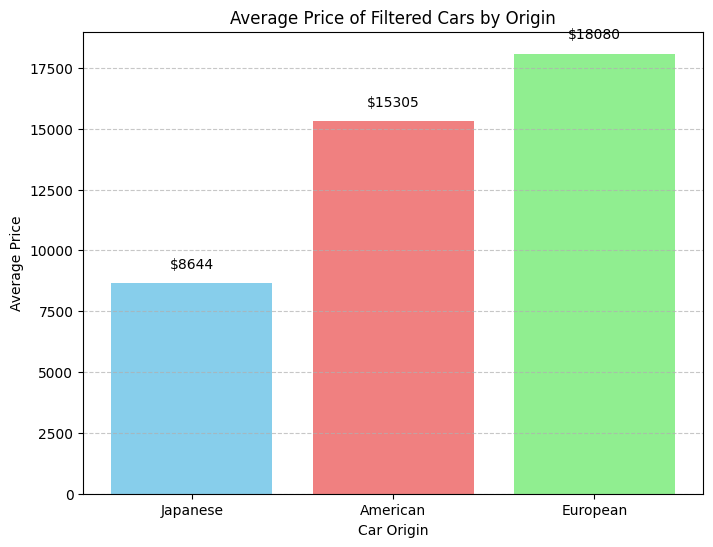

In [20]:
import matplotlib.pyplot as plt

categories = ['Japanese', 'American', 'European']
average_prices = [average_price_japanese_cars, average_price_american_cars, average_price_european_cars]

plt.figure(figsize=(8, 6))
plt.bar(categories, average_prices, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Car Origin")
plt.ylabel("Average Price")
plt.title("Average Price of Filtered Cars by Origin")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for i, price in enumerate(average_prices):
    plt.text(i, price + 500, f"${price:.0f}", ha='center', va='bottom')

plt.show()

In [29]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'nissan'].shape[0]

44

In [33]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'toyota'].shape[0]

0

In [34]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'honda'].shape[0]

5

In [35]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'lexus'].shape[0]

0

In [36]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'acura'].shape[0]

1

In [37]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'infiniti'].shape[0]

1

In [38]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'mazda'].shape[0]

0

In [39]:
filtered_japanese_cars[filtered_japanese_cars['brand'] == 'subaru'].shape[0]

0